# Binomialverteilung

## Definition:
Sie haben eine Zufallsvariable $X$ die sich ergibt als Summe von viele Zufallsvariable $X_1, X_2, ... X_n$ die Bernoulli verteilt mit dem selben Parameter $p$ und unabhängig sind $X= X_1+X_2+...+X_n$.
Mit anderen Worten ich wieserholde ein Experiment $n$ mal was entweder klappen oder schiefgehen kann und $X$ zählt wie oft es geklappt hat:

$(X=k)$ bedeutet ich $k$ Erfolge habe.

Dann sagen wir $X$ ist binomial verteilt mit dem Parametern $n$ und $p$ und schreiben wir $$X\sim B_{n,p}$$
- $n$ ist die Anzahl der Wiederholgen (wie oft versuche ich etwas)
- $p$ ist die Wahscheinlichkeit dafür, dass es bei einem Experiment Erfolg gibt.

Bei diesem Zufallsvariable es könnte Werte zwischen $0$ und $n$ rauskommen.
- Im schlimmsten Fall kann es sein dass ich n mal was probiere und dass es nie passiert.
- Im besten Fall habe ich $n$ mal Erfolg

### Wahrscheinlichkeitsfunktion.

Angenommen wir führen 4 Versuche aus und wir wollen wissen was die Wahscheinlichkeit dafür ist, dass wir 2 mal Erfolg habe.
- $n=4$
- $k=2$
- $X=X_1+X_2+X_3+X_4$

|                            |               
|----------------------------------
|$P(X=2)$ =  $P(X_1=1,~X_2=1,~X_3=0,~X_4=0)$ |                          
|$~~~~~~~~~~~~~~~~~+ P(X_1=0,~X_2=0,~X_3=1,~X_4=1)$ |                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=0,~X_2=1,~X_3=0,~X_4=1)$ |                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=1,~X_2=0,~X_3=1,~X_4=0)$ |                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=1,~X_2=0,~X_3=0,~X_4=1)$ |                     
|$~~~~~~~~~~~~~~~~~+ P(X_1=0,~X_2=1,~X_3=1,~X_4=0)$ |       

Da $X_i$ unabhängig sind, dann dürfen wir diese Formel in einzelnen Wahscheinlichkeiten zerlegen

|                            |               
|----------------------------------
|$        P(X=2)$ = $P(X_1=1).P(X_2=1).P(X_3=0).P(X_4=0)$|                          
|$~~~~~~~~~~~~~~~~~+ P(X_1=0).P(X_2=0).P(X_3=1).P(X_4=1)$|                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=0).P(X_2=1).P(X_3=0).P(X_4=1)$|                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=0).P(X_2=0).P(X_3=1).P(X_4=0)$|                                
|$~~~~~~~~~~~~~~~~~+ P(X_1=1).P(X_2=0).P(X_3=0).P(X_4=1)$|                     
|$~~~~~~~~~~~~~~~~~+ P(X_1=0).P(X_2=1).P(X_3=1).P(X_4=0)$|
|$~~~~~~~~~~~~~~~~~=~~~~~~~~p~~~~~~~~.~~~~~~~~~p~~~~~~~~.~~~~(1-p)~~.~~~(1-p)$|
|$~~~~~~~~~~~~~~~~~+~~~~(1-p)~~~.~~~~(1-p)~~~.~~~~~~~~~p~~~~~~~.~~p~~$|
|$~~~~~~~~~~~~~~~~~+~~~~~(1-p)~~.~~~~~~~~~p~~~~~~~~.~~~(1-p)~~~.~~p~~$|
|$~~~~~~~~~~~~~~~~~+~~~~~~~~~p~~~~~~~~.~~~~(1-p)~~~.~~~~~~~~p~~~~~~~~.~~~(1-p)$|
|$~~~~~~~~~~~~~~~~~+~~~~~~~~p~~~~~~~~~.~~~~(1-p)~~~.~~~(1-p)~~~.~~p~~$|
|$~~~~~~~~~~~~~~~~~+~~~(1-p)~~~~.~~~~~~~~~p~~~~~~~~.~~~~~~~~~p~~~~~~~.~~~~~(1-p)$|


Da es $C_4^2$ Möglichkeiten 2 einzelnen aus dem vier auszuwählen gibt. Dann $$P(X=2)=C_4^2.p^2.(1-p)^{4-2}$$

Ganz allgemein Die Wahscheinlichkeitsfunktion einer Binomialverteilung ist: $$P(X=k)=C_n^k.p^k.(1-p)^{n-k}$$

### Erwartungswert:
$$E(X)=E(X_1+X_2+...+X_n)= E(X_1)+E(X_2)+...+E(X_n) = p+p+...+p = n.p$$

### Varianz:
Da $X_i$ unabhängig sind:
$$Var(X)=Var(X_1)+Var(X_2)+...+Var(X_n)=n.p.(1-p)$$

# Python

Man muss die obigen Werte nicht per Hand berechnen sondern wir können auch Python dafür übernehmen

In [1]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Binomial-verteilung initialisieren
# 10 Experiments und 0.5 ist die Wahscheinlichkeit für jedes einzel Experiment
bi = binom(10, 0.5)

## Wahrscheinlichkeitsfunktion:

In [3]:
# P(X=3) =?
bi.pmf(3)

0.1171875

In [4]:
# P(X=5) =?
bi.pmf(5)

0.24609375000000003

### Wahrscheinlichkeitsfunktion ploten

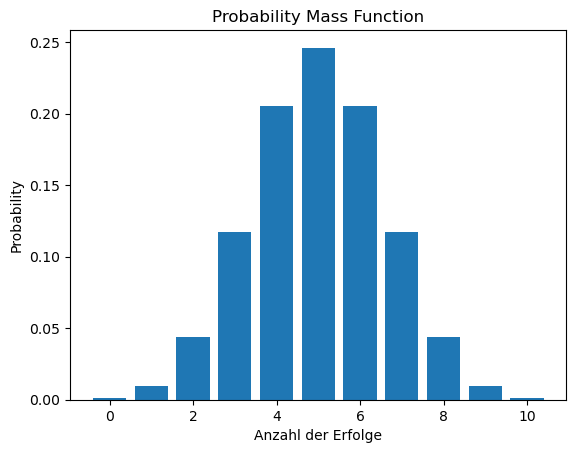

In [5]:
def prob_mass_fct(verteilung, start, end):
    x = np.arange(start, end + 1, 1)  # Define x values with step size 1
    y = verteilung.pmf(x)
    plt.bar(x, y)
    plt.title("Probability Mass Function")
    plt.xlabel("Anzahl der Erfolge")
    plt.ylabel("Probability")
    plt.show()
prob_mass_fct(bi, 0, 10)

Wenn die Wahrscheinlichkeit für jedes einzel Experiment 0.5 ist dann bekomme ich so einen schönen symetrischen Verteilung.
- Am wahrscheinlichsten ist, dass ich 5 mal Erfolg habe.
- Nach außen wird es unwahrscheinlicher (0, 10) aber es ist natürlich nicht total unwahrscheinlich, das es  passiert

Nun ändern wie die Wahrscheinlichkeit

In [6]:
bi = binom(10, 0.75)

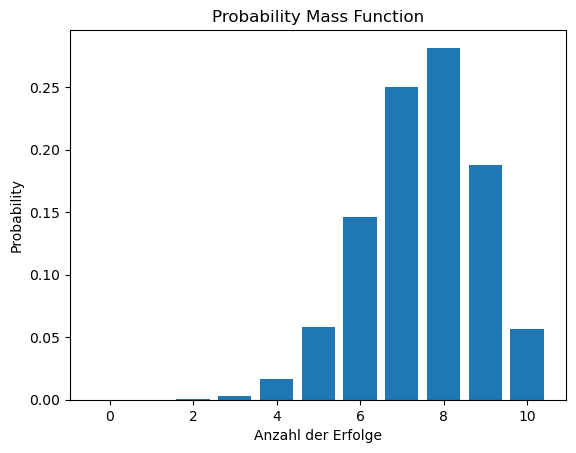

In [7]:
prob_mass_fct(bi, 0, 10)

Der Berg sozusagen wurde nach rechts gewandert, jetzt haben wir kein symetrischer Bild mehr sondern es wird wahrscheinlicher, dass mehr Experimente Erfolg haben. Weil die Wahrscheinlichkeit für ein Einzelerfolg größer geworden ist

Nichtsdestotrotz muss es immer noch so sein, dass Werte von 0 bis 10 betrachtet werden. Selbst wenn ihre  Wahrschnlichkeiten geringer ist sowie bei 0 und 1 in diesem Fall. Es ist natürlich nicht absolut unwharscheilich dass es passiert

### Erwartungswert:

In [8]:
# E(X)=?
bi.expect()

7.499999999999997

### Varianz

In [9]:
# Var(X)
bi.var()

1.875

### Standardabweichung

In [10]:
bi.std()

1.3693063937629153

Die Standardabweichung beträgt also ungefähr 1.369. Dies bedeutet, dass die Streuung der Ergebnisse um den Mittelwert herum etwa 1.369 beträgt.

## Verteilungsfunktion: F(x)

nehmen wir das letzte Binomialverteilung

In [12]:
bi = binom(10, 0.75)

In [13]:
# F(5) =P(X<=5)=?
bi.cdf(5)

0.07812690734863281

In [14]:
# F(8)=?
bi.cdf(8)

0.7559747695922852

Dies bedeutet das die Wahrscheinlichkeit dafür, dass ich 8 oder weniger Erfolge habe beträgt etwa 0.755

### Verteilungsfunktion ploten

In [15]:
def cdf_fct(verteilung, interval, samples=100):
    x = np.linspace(interval[0], interval[1], samples)
    y = verteilung.cdf(x)
    plt.plot(x, y)
    plt.title('Verteilungsfunktion von Binomialverteilung')
    plt.xlabel('Anzahl der Erfolge')
    plt.ylabel('Cumulative Probability')
    plt.show()

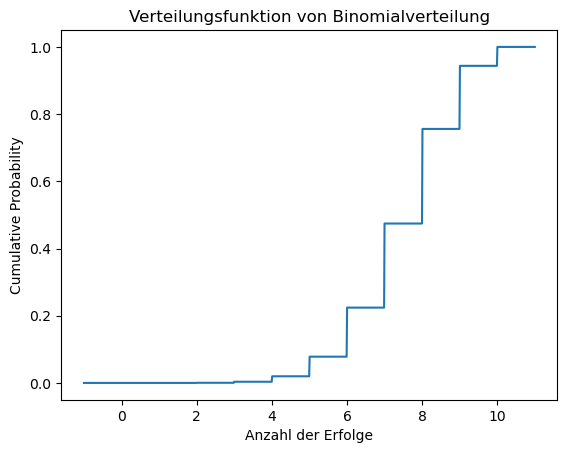

In [16]:
cdf_fct(bi, [-1, 11], 1000)